# Part 1

In [1]:
using PyPlot

srand(4242);

Objective function is
$$ f(x) = \frac{1}{2} x^2 $$
so the gradient is
$$ f(x) = x $$

In [2]:
function grad_f(x)
    return x
end

grad_f (generic function with 1 method)

Suppose that our samples are of the form
$$\tilde f(x) = \frac{1}{2} (x + z)^2$$
where $z \sim N(0,1)$ is a standard Gaussian random variable. Then
$$ \nabla \tilde f(x) = x + z $$

In [3]:
function sample_grad_f(x)
    return x + randn(length(x)) / sqrt(length(x))
end

sample_grad_f (generic function with 1 method)

In [4]:
function gradient_descent(x0, alpha, num_iters)
    dist_to_optimum = zeros(num_iters)
    x = x0
    for t = 1:num_iters
        dist_to_optimum[t] = norm(x)
        x = x - alpha * grad_f(x)
    end
    return dist_to_optimum
end

function stochastic_gradient_descent(x0, alpha, num_iters)
    dist_to_optimum = zeros(num_iters)
    x = x0
    for t = 1:num_iters
        dist_to_optimum[t] = norm(x)
        x = x - alpha * sample_grad_f(x)
    end
    return dist_to_optimum
end

function stochastic_gradient_descent_until(x0, alpha, accuracy, num_iters)
    x = x0
    for t = 1:num_iters
        x = x - alpha * sample_grad_f(x)
        if norm(x) <= accuracy
            return t
        end
    end
    return num_iters
end

stochastic_gradient_descent_until (generic function with 1 method)

In [5]:
x0 = 5 * randn(100);
num_iters = 1000000;

In [6]:
function noise_ball_size(dists)
    return sqrt(mean(dists[ceil(length(dists/2)):end].^2))
end

noise_ball_size (generic function with 1 method)

In [7]:
alphas = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5];
ball_sizes = [noise_ball_size(stochastic_gradient_descent(x0, alpha, num_iters)) for alpha in alphas];

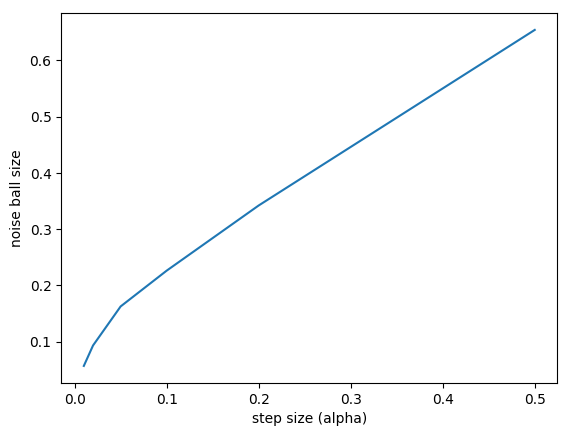

In [8]:
plot(alphas, ball_sizes);
xlabel("step size (alpha)");
ylabel("noise ball size");

In [9]:
convergence_times = [mean([stochastic_gradient_descent_until(x0, alpha, 1.0, num_iters) for k=1:5]) for alpha in alphas];

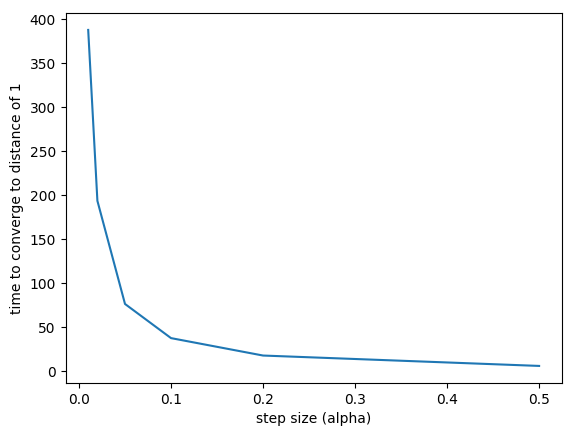

In [10]:
plot(alphas, convergence_times);
xlabel("step size (alpha)");
ylabel("time to converge to distance of 1");

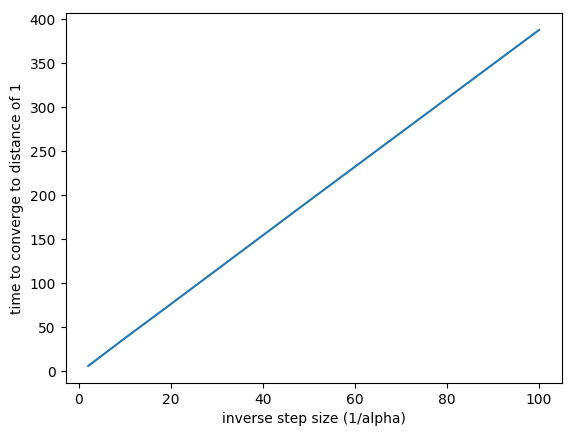

In [11]:
plot(1 ./ alphas, convergence_times);
xlabel("inverse step size (1/alpha)");
ylabel("time to converge to distance of 1");

---

# Part 2

In [12]:
function stochastic_gradient_descent_diminishing(x0, num_iters)
    dist_to_optimum = zeros(num_iters)
    alphas = zeros(num_iters)
    x = x0
    mu = 1.0
    M = 1.0
    rho0 = norm(x0)^2
    for t = 1:num_iters
        alpha = (2 * mu * rho0) / (4 * M + mu^2 * rho0 * (t-1))
        alphas[t] = alpha
        dist_to_optimum[t] = norm(x)
        x = x - alpha * sample_grad_f(x)
    end
    return (alphas, dist_to_optimum)
end

stochastic_gradient_descent_diminishing (generic function with 1 method)

In [13]:
x0 = randn(100) / 10;
(alphas, dto_diminishing) = stochastic_gradient_descent_diminishing(x0, 1000);

alpha1 = 0.5 * norm(x0)^2; # same as first step
alpha2 = 2 / (4 + norm(x0)^2 * 100); # intermediate
alpha3 = 2 / (4 + norm(x0)^2 * 1000); # same as last step

dto1 = stochastic_gradient_descent(x0, alpha1, 1000);
dto2 = stochastic_gradient_descent(x0, alpha2, 1000);
dto3 = stochastic_gradient_descent(x0, alpha3, 1000);

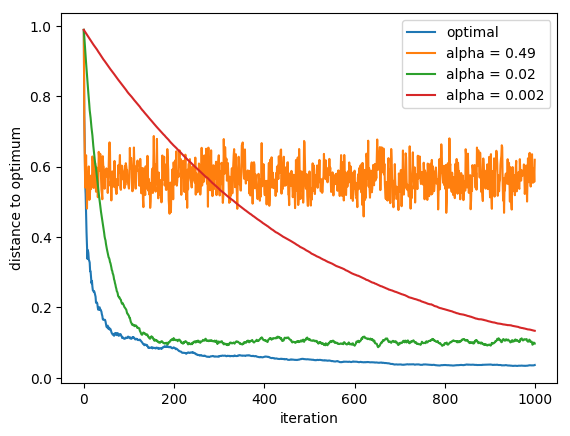

In [14]:
plot(dto_diminishing, label="optimal");
plot(dto1; label = "alpha = $(signif(alpha1, 2))");
plot(dto2; label = "alpha = $(signif(alpha2, 2))");
plot(dto3; label = "alpha = $(signif(alpha3, 2))");
xlabel("iteration");
ylabel("distance to optimum");
legend();

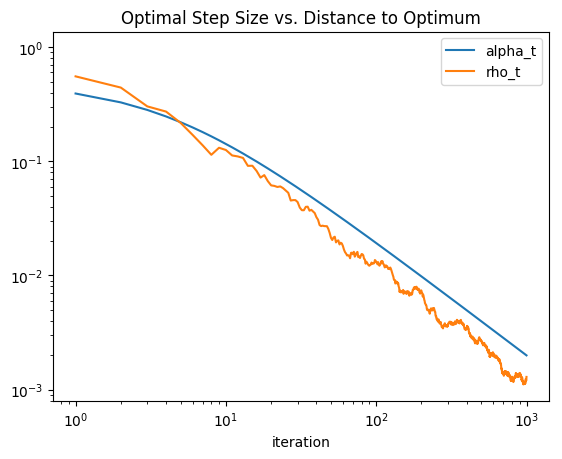

In [15]:
loglog(alphas; label = "alpha_t");
loglog(dto_diminishing.^2; label = "rho_t");
xlabel("iteration");
title("Optimal Step Size vs. Distance to Optimum");
legend();

---

# Part 3

In [16]:
x = randn(10); y = sqrt(0.95) * x + sqrt(0.05) * randn(10);

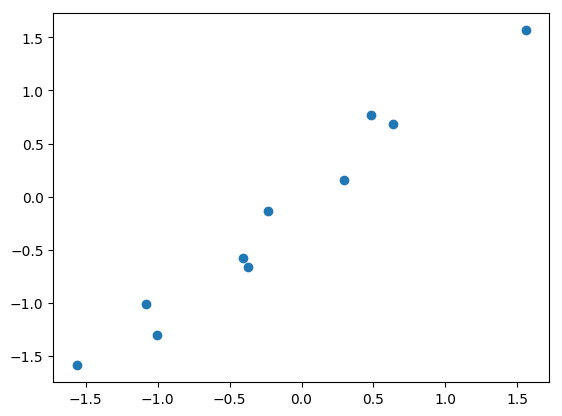

PyObject <matplotlib.collections.PathCollection object at 0x31f4d1810>

In [17]:
scatter(x, y)

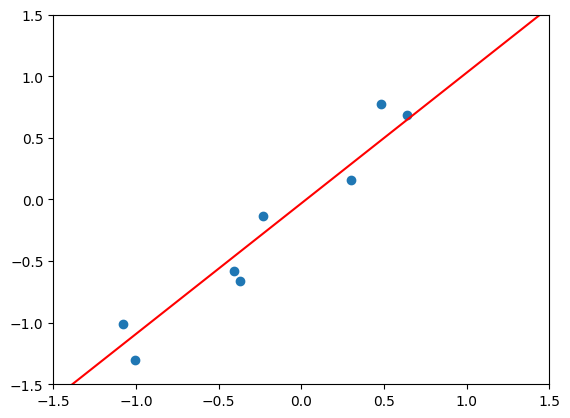

training error: 0.028


In [18]:
# fit with linear regression

f = [x ones(10)];
w = y' / f';

xplot = collect(-1.5:0.1:1.5);
fplot = [xplot ones(length(xplot))]

plot(xplot, fplot * w'; color="red");
scatter(x, y);

xlim([-1.5, 1.5]);
ylim([-1.5, 1.5]);

training_error = round(mean((y - f * w').^2),3)
println("training error: $(training_error)")

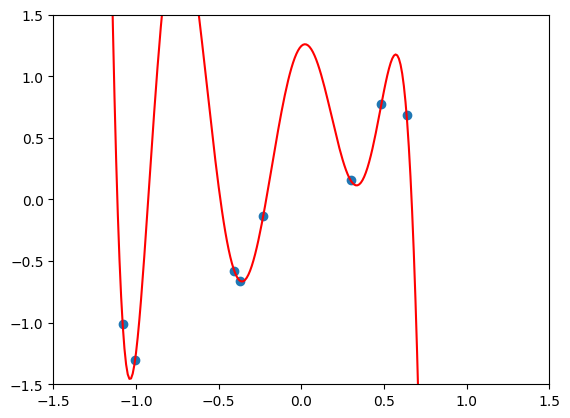

training error: 0.0


In [19]:
# fit with degree 10 polynomial

f = hcat([x.^k for k = 0:10]...);
w = y' / f';

xplot = collect(-1.5:0.01:1.5);
fplot = hcat([xplot.^k for k = 0:10]...)

plot(xplot, fplot * w'; color="red");
scatter(x, y);

xlim([-1.5, 1.5]);
ylim([-1.5, 1.5]);

training_error = round(mean((y - f * w').^2),3)
println("training error: $(training_error)")

In [20]:
test_x = randn(20); test_y = sqrt(0.9) * test_x + sqrt(0.1) * randn(20);

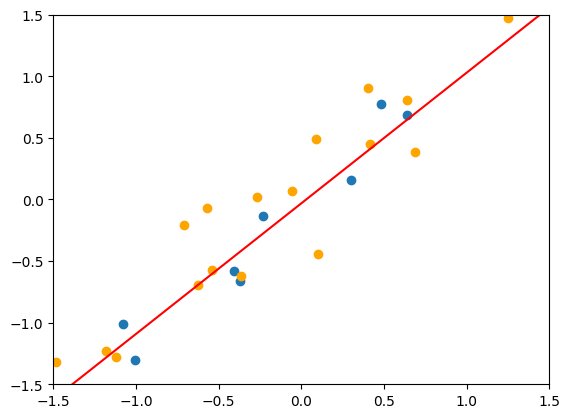

training error: 0.028
test error: 0.094


In [21]:
# fit with linear regression

f = [x ones(10)];
w = y' / f';

xplot = collect(-1.5:0.1:1.5);
fplot = [xplot ones(length(xplot))]

plot(xplot, fplot * w'; color="red");
scatter(x, y);
scatter(test_x, test_y; color="orange");

xlim([-1.5, 1.5]);
ylim([-1.5, 1.5]);

training_error = round(mean((y - f * w').^2),3)
println("training error: $(training_error)")

test_f = [test_x ones(length(test_x))];

test_error = round(mean((test_y - test_f * w').^2),3)
println("test error: $(test_error)")

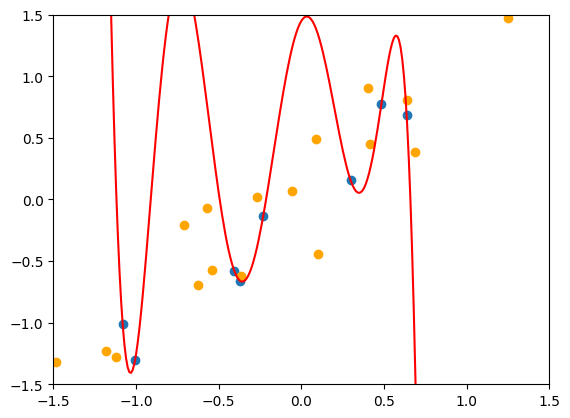

training error: 0.0
test error: 22058263.902000

In [22]:
# fit with degree 10 polynomial

f = hcat([x.^k / factorial(k) for k = 0:10]...);
w = y' / f';

xplot = collect(-1.5:0.01:1.5);
fplot = hcat([xplot.^k / factorial(k) for k = 0:10]...)

plot(xplot, fplot * w'; color="red");
scatter(x, y);
scatter(test_x, test_y; color="orange");

xlim([-1.5, 1.5]);
ylim([-1.5, 1.5]);

training_error = round(mean((y - f * w').^2),3)
println("training error: $(training_error)")

test_f = hcat([test_x.^k / factorial(k) for k = 0:10]...)

test_error = round(mean((test_y - test_f * w').^2),3)
@printf("test error: %f", test_error)

---

# Part 4

Suppose that we use regularization such that for a polynomial of the form
$$f_w(x) = \sum_{k = 0}^{10} \frac{w_k x^k}{k!}$$
the loss function is
$$h(w) = \sum_{i=1}^N (f_w(x_i) - y_i)^2 + \sigma^2 \| w \|^2.$$
If $A$ is the matrix such that
$$ A_{i,j} = \frac{x_i^j}{j!} $$
then equivalently
$$h(w) = \left\| \left[\begin{array}{c} A \\ \sigma I \end{array} \right] w - \left[\begin{array}{c} y \\ 0 \end{array} \right] \right\|^2$$
so we can still solve this easily with linear regression.

training error: 0.021


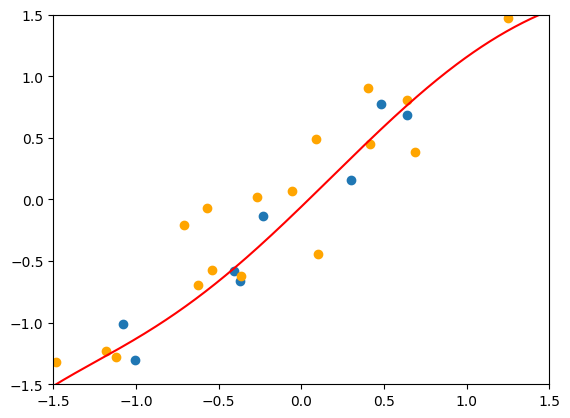

test error: 0.924000

In [23]:
# fit with regularized degree 10 polynomial

sigma = 0.01

f = hcat([x.^k / factorial(k) for k = 0:10]...);
f_reg = vcat(f, sigma * eye(11))
y_reg = vcat(y, zeros(11))

w = y_reg' / f_reg';

xplot = collect(-1.5:0.01:1.5);
fplot = hcat([xplot.^k / factorial(k) for k = 0:10]...)

plot(xplot, fplot * w'; color="red");
scatter(x, y);
scatter(test_x, test_y; color="orange");

xlim([-1.5, 1.5]);
ylim([-1.5, 1.5]);

training_error = round(mean((y - f * w').^2),3)
println("training error: $(training_error)")

test_f = hcat([test_x.^k / factorial(k) for k = 0:10]...)

test_error = round(mean((test_y - test_f * w').^2),3)
@printf("test error: %f", test_error)

In [24]:
function regularized_fit_error(sigma)  
    test_x = randn(10000); test_y = sqrt(0.9) * test_x + sqrt(0.1) * randn(10000);
    
    f = hcat([x.^k / factorial(k) for k = 0:10]...);
    f_reg = vcat(f, sigma * eye(11))
    y_reg = vcat(y, zeros(11))

    w = y_reg' / f_reg';

    test_f = hcat([test_x.^k / factorial(k) for k = 0:10]...)
    
    training_error = round(mean((y - f * w').^2),3)
    test_error = round(mean((test_y - test_f * w').^2),3)
    
    return (training_error, test_error)
end

regularized_fit_error (generic function with 1 method)

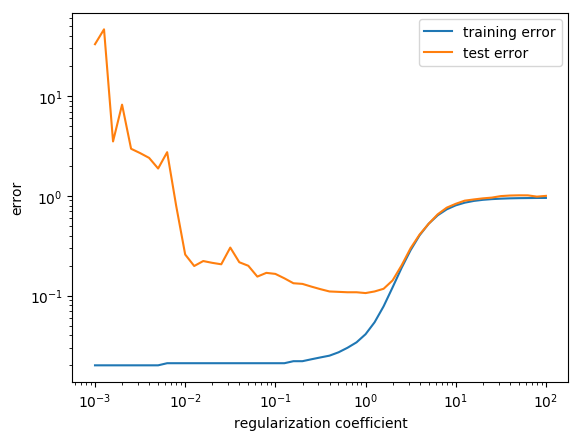

In [25]:
sigmas = 10.^(-3:0.1:2);
training_errors = zeros(length(sigmas));
test_errors = zeros(length(sigmas));

for i = 1:length(sigmas)
    (training_errors[i], test_errors[i]) = regularized_fit_error(sigmas[i]);
end

loglog(sigmas, training_errors, label="training error");
loglog(sigmas, test_errors, label="test error");
xlabel("regularization coefficient");
ylabel("error");
legend();